## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle.

The dataset contains a comprehensive list of the most famous songs and most streamed songs as listed on Spotify. 

No need to dowload it, is is already in this directory under `Popular_Spotify_Songs.csv`

**For these exercises and the upcoming studio, we will be using the `matplotlib` library**

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

You can use Excel to open the csv directly and acquant yourself with the data. Then based on what you see, you can make cleaning decisions. 

I have included my work below. Feel free to build on it as needed.

**To understand what a column represents in the dataset, you should google `Spotify [column name] data explanation`**

In [2]:
# import all librarys and modules needed
import pandas as pd
import numpy
import matplotlib.pyplot as plt

# We need to include an encoding tag with this dataset
## Otherwise, we will get an error trying to read non-latin characters in the dataset
df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')

df.drop_duplicates()
df = pd.DataFrame(df)

# The below command gets rid of one weird row of 'streams' data for a song.
## Using Excel or pandas, find what that value is and think why it would cause issues when trying
## to classify this column as 'numeric' data
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# We need to specifically convert these fields to be numeric, since they are imported
## by default as string data
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')  # Harrison note: coerce makes errors into NaN. You can also 'raise' an exception or 'ignore'.
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')

# It'll be beneficial to have the column names of the data on hand
display(df.columns)


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### Creating Visualizations

Now that the data is ready, we will create a number of different visualizations.

We have included a graphic for `Abela's Chart Suggestions` below. 

It was used to determine the best chart type for the questions in this exercise.

![chart-suggestions.png](./Abelas-Chart-Selection-Diagram.jpg)

# Exercise Explanation

Each section of this file will be broken up by chart type.

For each chart type, we will provide you with a full data visualization example that answers a question for the Spotify dataset.

It will then be your turn to answer a different question with your own data visualization.

# Line Charts

#### Example - Single Line Chart

Question:

**What is the total number of streams for all songs, plotted over `release_year`?**

Text(0, 0.5, 'Total Streams (in billions)')

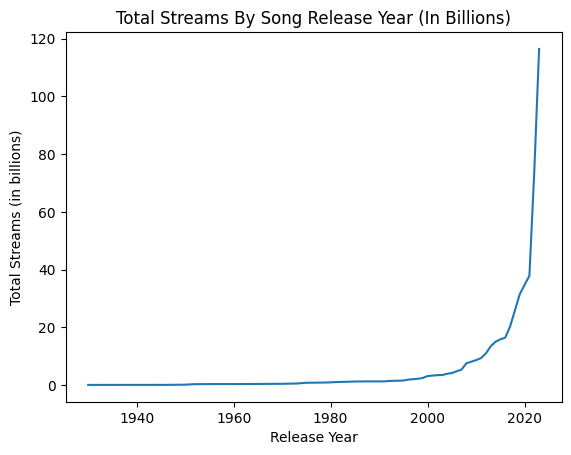

In [3]:
# Single line chart
years = numpy.sort(df["released_year"].unique())
sum_by_year = numpy.sort(df.groupby("released_year")["streams"].sum())

# converting to billions to make linechart easier to read
for i in range(len(sum_by_year)):
	sum_by_year[i] = sum_by_year[i] / 1000000000

plt.plot(years, sum_by_year)
plt.title("Total Streams By Song Release Year (In Billions)")
plt.xlabel("Release Year")
plt.ylabel("Total Streams (in billions)")



#### Your Turn

Question:

**What is the total number of times all songs were added to a Spotify playlist, plotted over `release_year`?**

Text(0, 0.5, 'Times songs were added to a playlist')

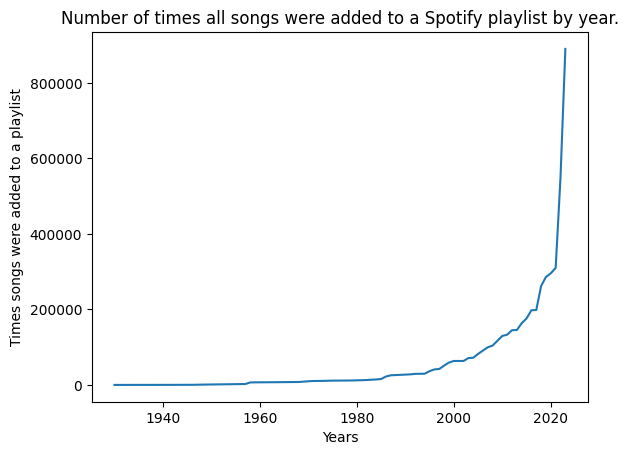

In [4]:
# Code Here
year = numpy.sort(df['released_year'].unique()) 
playlist_add =  numpy.sort(df.groupby("released_year")["in_spotify_playlists"].sum())


#Make the plot
pladd_plot = plt.plot(year, playlist_add)
plt.title("Number of times all songs were added to a Spotify playlist by year.")
plt.xlabel("Years")
plt.ylabel("Times songs were added to a playlist")

#### Example - Multi Line Chart

**For songs released after 2009, create a multi-line chart with two data variables**
1. Line showing total number of streams for songs with a `Major` mode, plotted by release year
2. Line showing total number of streams for songs with a `Minor` mode, plotted by release year

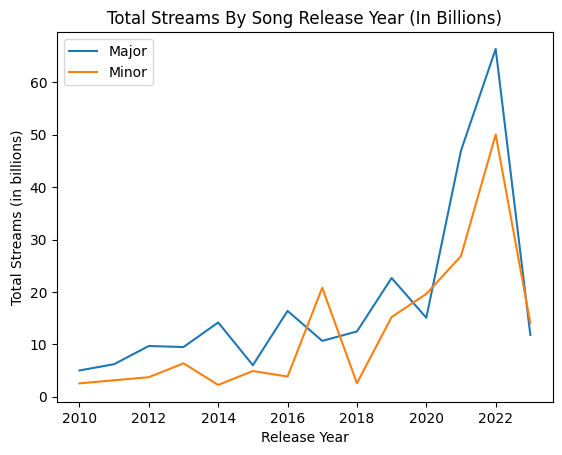

In [5]:
# Multi Line chart 
years = numpy.sort(df[df["released_year"] > 2009]["released_year"].unique()) #Harrison Note: This is sorting a list of the unique years for the released year column where the year is over 2009 (I changed from 2008 due to prompt).
streaming_sums = df.groupby("released_year")["streams"].sum() #Harrison note, like the previous problem this is summing the stream totals for each year in the df/

major_list = []
minor_list = []




# in billions
for y in years:
	major = df.loc[(df["released_year"] == y) & (df["mode"] == "Major")]["streams"].sum() / 1000000000  #looks for rows with released year in years list accessed and then if it is major it sums all the stream columns together (divides by billion to make it easier to read)
	minor = df.loc[(df["released_year"] == y) & (df["mode"] == "Minor")]["streams"].sum() / 1000000000
	major_list.append(major)
	minor_list.append(minor) #Harrison Note: .append adds to a list


plt.plot(years, major_list, label = "Major") #Harrison Note: label will be in legend
plt.plot(years, minor_list, label = "Minor")

plt.title("Total Streams By Song Release Year (In Billions)")
plt.xlabel("Release Year")
plt.ylabel("Total Streams (in billions)")
plt.legend()


#### Your Turn

**For songs released after 2009, create a multi line chart with three data variables**
1. Line showing total times all songs were added to a Spotify playlist, plotted by release year 
1. Line showing total times all songs were added to an Apple playlist, plotted by release year 
1. Line showing total times all songs were added to a Deezer playlist, plotted by release year 

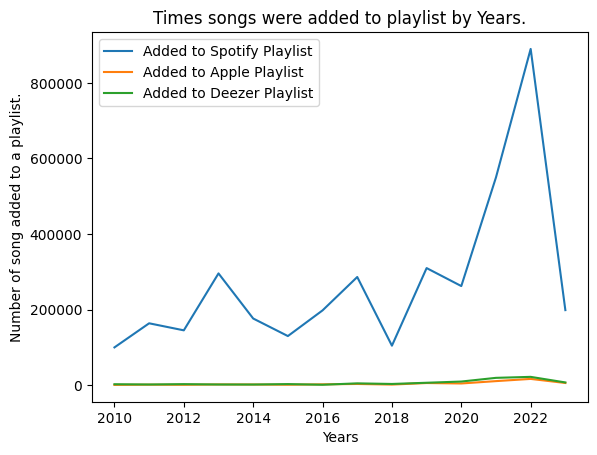

In [6]:
# Code Here
# Multi Line chart 

years_09 = numpy.sort(df[df['released_year'] > 2009]['released_year'].unique())

spot_list = []
apple_list = []
deez_list = []


for i in years_09:
    add_spot = df.loc[df['released_year'] == i]['in_spotify_playlists'].sum()
    add_apple = df.loc[df['released_year'] == i]['in_apple_playlists'].sum()
    add_deez = df.loc[df['released_year'] == i]['in_deezer_playlists'].sum()
    spot_list.append(add_spot)
    apple_list.append(add_apple)
    deez_list.append(add_deez)


plt.plot(years_09, spot_list, label="Added to Spotify Playlist")
plt.plot(years_09, apple_list, label="Added to Apple Playlist")
plt.plot(years_09, deez_list, label="Added to Deezer Playlist")

plt.title("Times songs were added to playlist by Years.")
plt.xlabel("Years")
plt.ylabel("Number of song added to a playlist.")
plt.legend()


# Bar Charts

#### Example - Vertical Bar Chart

Question:

**What is the total number of streams for 'Major' mode and 'Minor' mode songs in the dataset?**

Text(0, 0.5, 'Total Streams (in billions)')

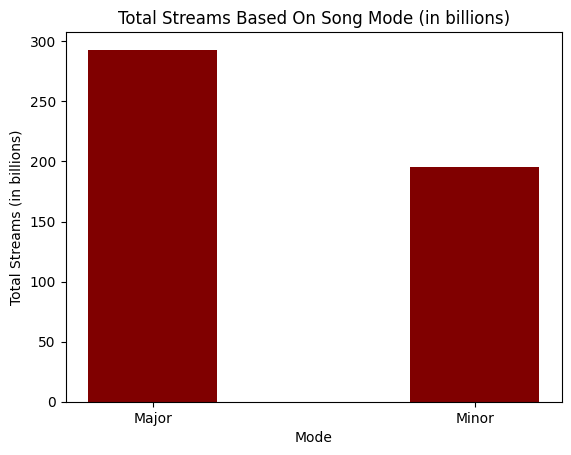

In [7]:
keys = list(df[df["mode"].notnull()]["mode"].unique())
streams_by_mode = []

# in billions
for k in keys:
	sum = int(df[df["mode"] == k]["streams"].sum() / 1000000000)
	streams_by_mode.append(sum)

plt.bar(x=keys, height=streams_by_mode,width=.4, color ='maroon')

plt.title("Total Streams Based On Song Mode (in billions)")
plt.xlabel("Mode")
plt.ylabel("Total Streams (in billions)")


#### Your Turn

Question:

**What is the total number of times all songs were `in_spotify_playlists`, `in_apple_playlists`, and `in_deezer_playlists`?**


Text(0.5, 0, 'Platforms')

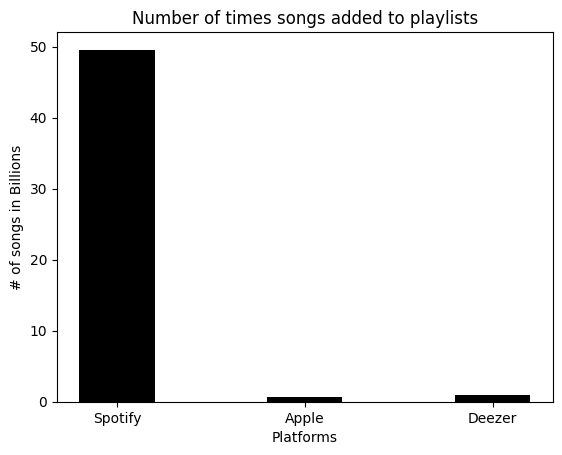

In [8]:
# # Code Here
# # We want to sum columns - for apple playlist, deezewr, and spotify and then graph them in a bar chart

app_keys = ['Spotify', 'Apple', 'Deezer']

spot_songs = int(df['in_spotify_playlists'].sum()) / 100000
apple_songs = int(df['in_apple_playlists'].sum()) / 100000
deezer_songs = int(df['in_deezer_playlists'].sum()) / 100000

song_keys = [spot_songs, apple_songs, deezer_songs]

plt.bar(app_keys, song_keys, width=0.4, color='black')

plt.title("Number of times songs added to playlists")
plt.ylabel("# of songs in Billions")
plt.xlabel("Platforms")


# Could've done a for loop to simplify!
# app_keys = ['Spotify', 'Apple', 'Deezer']
# columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# song_keys = [df[col].sum() / 100000 for col in columns]

# plt.bar(app_keys, song_keys, width=0.4, color='black')

# plt.title("Number of times songs added to playlists")
# plt.ylabel("# of songs in Billions")
# plt.xlabel("Platforms")


#### Example - Horizontal Bar Chart

Question:

**What is the total streams of all songs, organized by `artist_count`?**

Text(0.5, 0, 'Total Streams (in billions)')

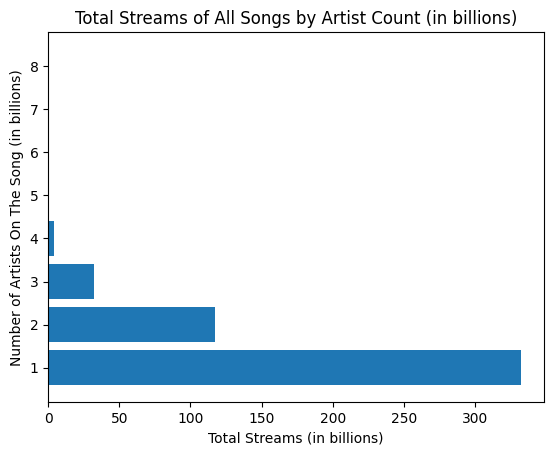

In [9]:
# Horizontal bar chart
keys = list(df[df["key"].notnull()]["artist_count"].unique())

streams_by_artist_count = []

# in billions
for k in keys:
	sum = int(df[df["artist_count"] == k]["streams"].sum() / 1000000000)
	streams_by_artist_count.append(sum)

plt.barh(keys, streams_by_artist_count, align='center')
plt.title("Total Streams of All Songs by Artist Count (in billions)")
plt.ylabel("Number of Artists On The Song (in billions)")
plt.xlabel("Total Streams (in billions)")

#### Your Turn

Question:
**What is the total streams for all songs, organized by `key`?**

Text(0.5, 0, '# of songs in Hundred Trillions')

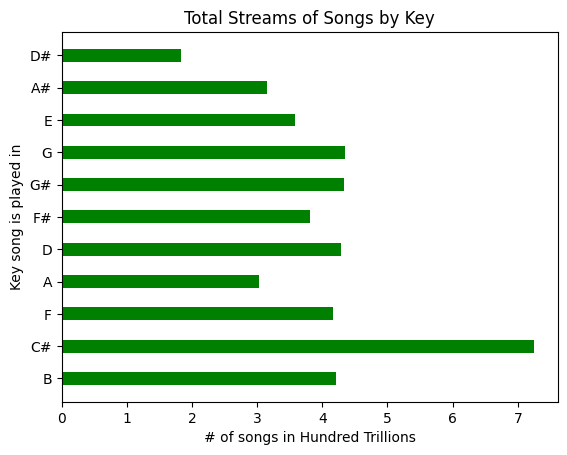

In [10]:
# Code Here
keys = list(df[df["key"].notnull()]['key'].unique())
stream_per_key = []

for k in keys:
    sk_number = df[df["key"] == k]["streams"].sum() / 10000000000
    stream_per_key.append(sk_number)

plt.barh(keys, stream_per_key, height=0.4, color = "green")
plt.title('Total Streams of Songs by Key')
plt.ylabel("Key song is played in")
plt.xlabel('# of songs in Hundred Trillions')


#### Example - Grouped Bar Chart


Question:

**For songs released between 2020 and 2022, what is the total streams of all songs organized by `mode`?**

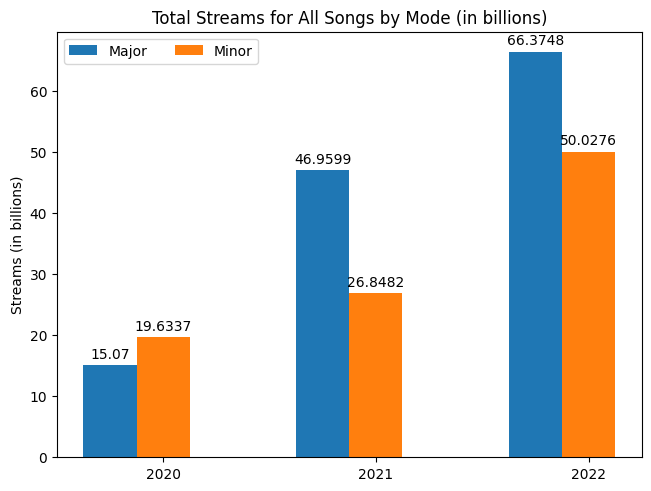

In [11]:
# Grouped bar chart

keys = list(df[df["mode"].notnull()]["mode"].unique())

data = df.loc[(df["released_year"] > 2019) & (df["released_year"] < 2023)]

years = [2020, 2021, 2022]
x = numpy.arange(len(years))
width = .25
multiplier = 0

fig, ax =plt.subplots(layout='constrained')

key_streams = {}

for k in keys:
	if k not in key_streams:
		key_streams[k] = []
	for y in years:
		# in billions
		sum = data.loc[(data["mode"] == k) & (data["released_year"] == y)]["streams"].sum() / 1000000000
		key_streams[k].append(sum)

for att, measurement in key_streams.items():
	offset = width * multiplier
	rects = ax.bar(x + offset, measurement, width, label=att)
	ax.bar_label(rects, padding=3)
	multiplier += 1

ax.set_ylabel('Streams (in billions)')
ax.set_title('Total Streams for All Songs by Mode (in billions)')
ax.set_xticks(x + width, years)
ax.legend(loc='upper left', ncols=3)

plt.show()
	


#### Your Turn

Question:

**For songs released between 2020 and 2022, what is the total number of times all songs were `in_spotify_playlists`, `in_apple_playlists`, and `in_deezer_playlists`?**

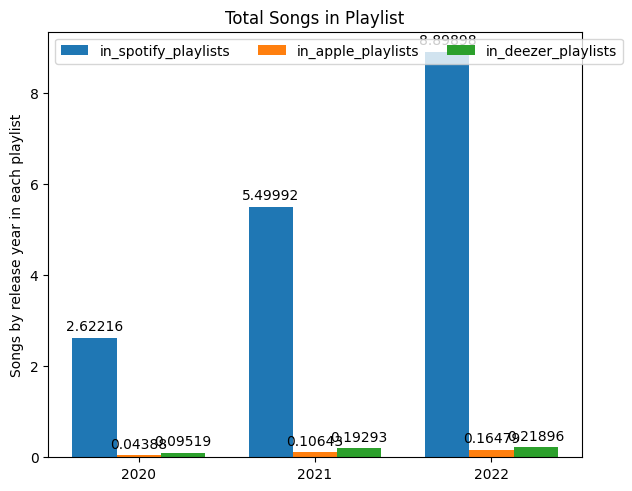

In [12]:
# Code Here
years = [2020, 2021, 2022]
x = numpy.arange(len(years))
playlists = ["in_spotify_playlists", "in_apple_playlists", "in_deezer_playlists"]
data_list = {}
width = 0.25
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

for playlist in playlists:
    if playlist not in data_list:
        data_list[playlist] = []
    for y in years:
        data = df.loc[(df['released_year']==y)][playlist].sum() /100000
        data_list[playlist].append(data)


for att, measurement in data_list.items():
	offset = width * multiplier
	rects = ax.bar(x + offset, measurement, width, label=att)
	ax.bar_label(rects, padding=3)
	multiplier += 1




ax.set_ylabel('Songs by release year in each playlist')
ax.set_title('Total Songs in Playlist')
ax.set_xticks(x + width, years)
ax.legend(loc='upper left', ncols=3)

plt.show()


# Scatter Plot

#### Example - Scatter Plot

Question:
**For songs released between 2000 and 2009, what is the relationship between valence and energy for songs in the dataset?**

**Valence**: describes the musical positiveness conveyed by a track. 

Tracks with high valence sound more positive (happy, cheerful, euphoric), while tracks with low valence sound more negative (sad, depressed, angry).

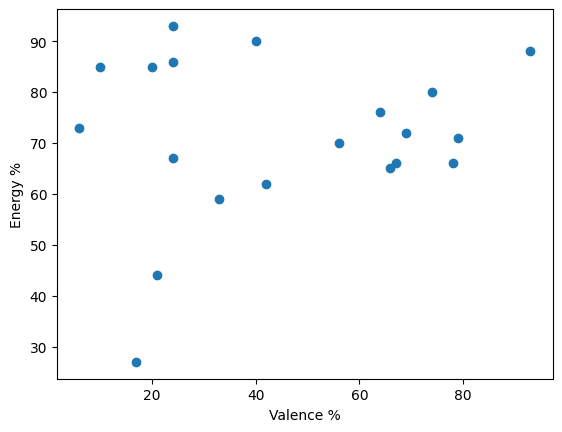

In [13]:
# scatter plot
data = df.loc[(df["released_year"] > 1999) & (df["released_year"] < 2010)]

plt.scatter(x=data['valence_%'], y=data['energy_%'])
plt.xlabel('Valence %')
plt.ylabel('Energy %')
plt.show()

#### Your Turn

Question:

**For songs released between 2016 and 2019, what is the relationship between danceability and speechiness for songs in the dataset?**

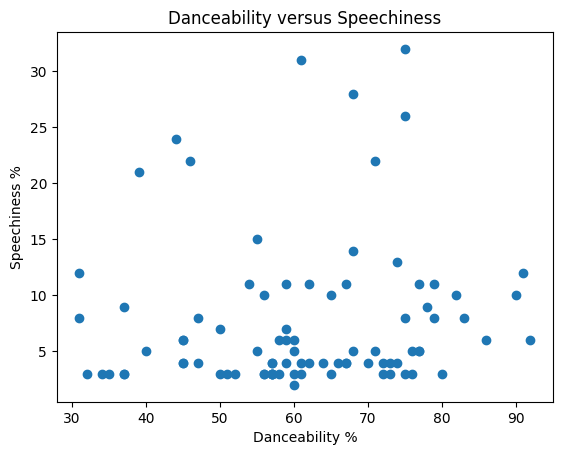

In [14]:
# Code Here
data = df.loc[(df['released_year']> 2015) & (df['released_year'] < 2020)]

plt.scatter(data['danceability_%'], data['speechiness_%'])
plt.xlabel('Danceability %')
plt.ylabel('Speechiness %')
plt.title("Danceability versus Speechiness")
plt.show()


# Histogram

#### Example - Histogram

Question:

**Create a graph that groups all songs in the dataset based on their danceability percentage**

(array([  7.,  31.,  38.,  89., 122., 139., 202., 175.,  99.,  51.]),
 array([23. , 30.3, 37.6, 44.9, 52.2, 59.5, 66.8, 74.1, 81.4, 88.7, 96. ]),
 <BarContainer object of 10 artists>)

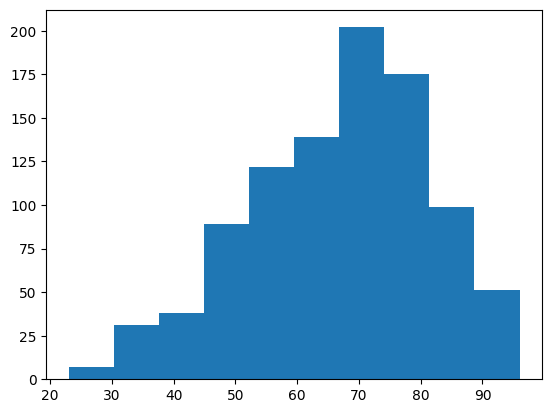

In [15]:
# histogram
plt.hist(df['danceability_%'])


#### Your Turn

Question:

**Create a graph that groups all songs in the dataset with over 1 billion streams by their bpm**

(array([ 4., 13., 22., 25., 28., 17., 17.,  8.,  8., 10.]),
 array([ 65. ,  77.1,  89.2, 101.3, 113.4, 125.5, 137.6, 149.7, 161.8,
        173.9, 186. ]),
 <BarContainer object of 10 artists>)

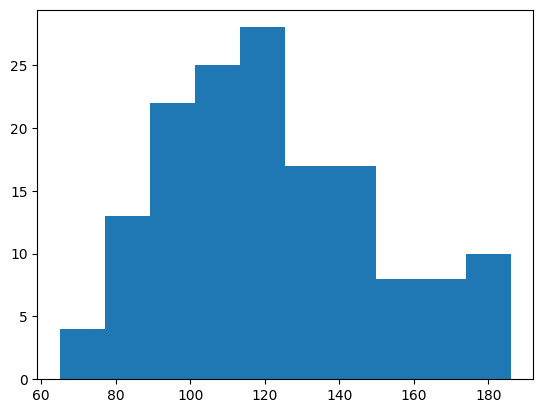

In [16]:
# Code Here
data = df.loc[df['streams'] > 1000000000]['bpm']
plt.hist(data)


# Pie Chart

#### Example - Pie Chart

Question

**Of the Adele songs in the dateset, what is each song's portion of her total streams?**

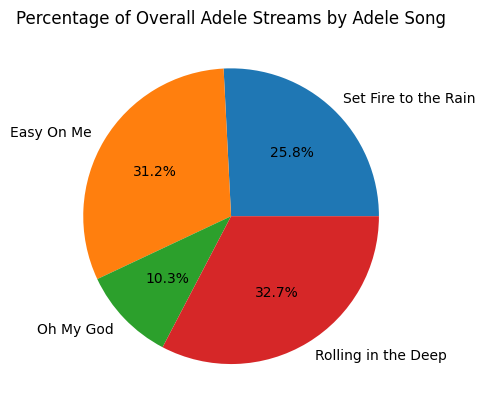

In [17]:
# pie chart
data = df.loc[(df['artist(s)_name'].str.startswith('Adele', na=False))]
data

plt.pie(data['streams'], labels=data['track_name'], autopct='%1.1f%%')
plt.title('Percentage of Overall Adele Streams by Adele Song')
plt.show()

#### Your Turn

Prompt:
**Breakdown the percentage of Dua Lipa's song streams based on `key`**

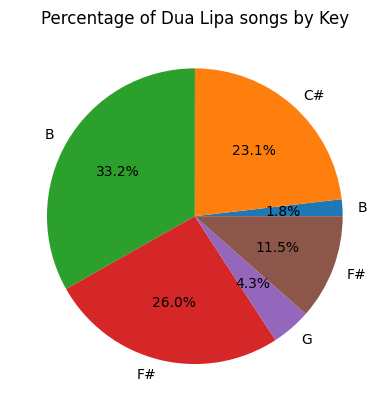

In [18]:
# Code Here
data = df.loc[df['artist(s)_name'].str.startswith("Dua Lipa", na=False)]


plt.pie(data['streams'], labels=data['key'],autopct='%1.1f%%')
plt.title('Percentage of Dua Lipa songs by Key')
plt.show()



# Bonus Missions

We wanted to make sure these exercises were approachable. To do so, we stuck to some pretty simple data analysis questions.

But, this is a very interesting dataset that could potentially answer deeper questions for these songs.

We are going to include a list of questions that would be interesting to answer with the dataset.

You can then do analysis and/or design visualizations to answer these questions.

1. For songs released between 1980 and 1989, chart the trend of the top song's (most streams for a song of that release year) danceability
2. For songs released between 1990 and 1999, chart the trend of the top song's (most streams for a song of that release year) valence
3. Find the `key` and `mode` combination that will most likely correlate with a top streaming song
4. Chart the relationship between valence and bpm for songs released in the 80s, 90s, and 2000s
5. Chart the relationship between a song's liveness and it's likelihood to be streamed more
6. What's the best day of the month to release a song on to get the most streams? 
7. For song's with a valence under 20%, which release month leads to the highest stream count?


#### Note from Christian:

Apologies for using the word 'leads' here, or any other language that implies 'causation' from a condition found in the data. 

# We should always remember that correlation != causation when doing analysis

Text(0.5, 0, 'Years')

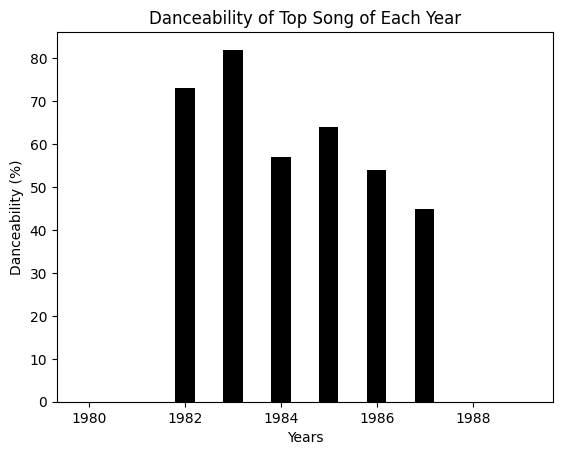

In [62]:
# Code here
# 1. For songs released between 1980 and 1989, chart the trend of the top song's (most streams for a song of that release year) danceability
# I think I will use a vertical bar graph, though I'd normally prefer a line graph... I'm also going to assume years are inclusive.
#Need to make a data set with the top song from each year and then chart its danceability


years = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]
data = {}
danceability = []

for y in years:
    if y not in data:
        data[y] = []
    top_streams = df.loc[df['released_year'] == y]['streams'].max()
    top_danceability_value = df.loc[(df['released_year'] == y) & (df['streams'] == top_streams), 'danceability_%'].values
    if len(top_danceability_value)> 0:
       danceability.append(top_danceability_value[0])
    else:
        danceability.append(0)

plt.bar(years, danceability, width=0.4, color='black')

plt.title("Danceability of Top Song of Each Year")
plt.ylabel("Danceability (%)")
plt.xlabel("Years")

Text(0.5, 0, 'Years')

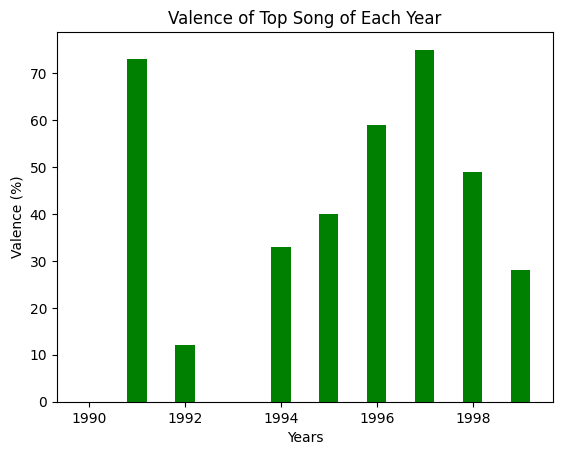

In [74]:
# 2. For songs released between 1990 and 1999, chart the trend of the top song's (most streams for a song of that release year) valence
years = range(1990, 2000)
valence = []

for year in years:
    year_data = df.loc[df['released_year'] == year]
    if year_data.empty:
        valence.append(0)
        continue #Note: I learnt that continue skips the rest of the for loop and moves to the next number. I learnt much of the above from putting my previous answer into ChatGPT and looking at what improvements I could make. It had other suggestions, but they were above my current capabilities.
    valence_data = year_data.loc[year_data['streams'] == year_data['streams'].max()]['valence_%'].values
    if len(valence_data) > 0:
        valence.append(valence_data[0])
    else:
        valence.append(0)

plt.bar(years, valence, width=0.4, color='green')

plt.title("Valence of Top Song of Each Year")
plt.ylabel("Valence (%)")
plt.xlabel("Years")

Text(0.5, 0, 'Number of Songs')

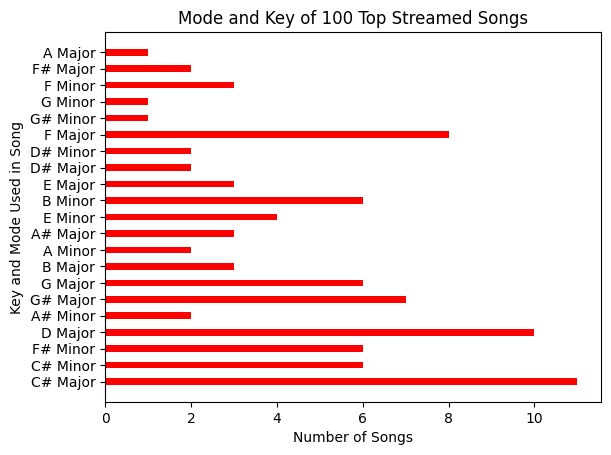

In [116]:
#3. Find the `key` and `mode` combination that will most likely correlate with a top streaming song

keys_mode = []
key_mode_songs = {}

top_hundred = df.sort_values(by='streams', ascending=False, na_position='last')
top_hundred = top_hundred.iloc[0:100]
top_hundred['Key and Mode'] = top_hundred['key'] + " " + top_hundred['mode']
keys_mode = top_hundred.loc[:,'Key and Mode'].dropna().unique()


for key in keys_mode:
    if key not in key_mode_songs:
        key_mode_songs[key] = 0
    number_of_songs_using = top_hundred.loc[top_hundred['Key and Mode']== key].shape[0]
    key_mode_songs[key] = number_of_songs_using

key_and_mode = list(key_mode_songs.keys())
amount = list(key_mode_songs.values())

plt.barh(key_and_mode, amount, height=0.4, color='red')

plt.title("Mode and Key of 100 Top Streamed Songs")
plt.ylabel("Key and Mode Used in Song")
plt.xlabel("Number of Songs")

#Looks like you want C# Major or D Major.

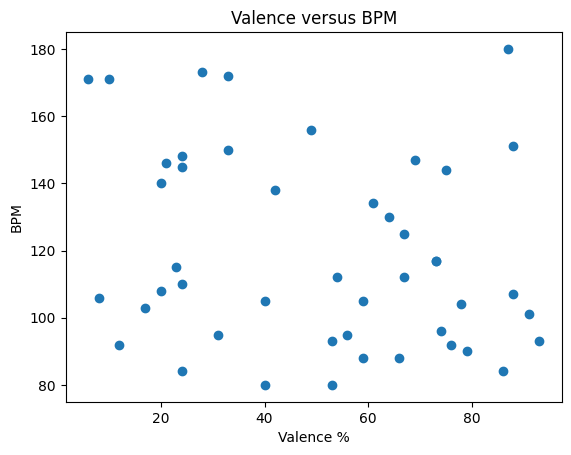

In [118]:
#4. Chart the relationship between valence and bpm for songs released in the 80s, 90s, and 2000s

years= range(1980, 2010)

data = df.loc[(df['released_year']> 1980) & (df['released_year'] < 2010)]

plt.scatter(data['valence_%'], data['bpm'])
plt.xlabel('Valence %')
plt.ylabel('BPM')
plt.title("Valence versus BPM")
plt.show()


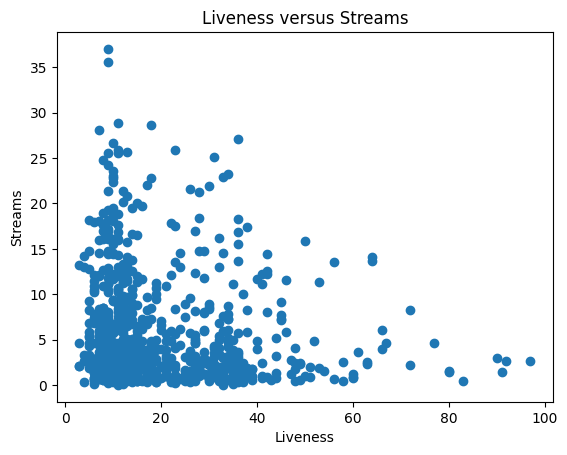

In [122]:
#5. Chart the relationship between a song's liveness and it's likelihood to be streamed more

l_streams = df['streams']/100000000

plt.scatter(df['liveness_%'], l_streams)
plt.xlabel('Liveness')
plt.ylabel('Streams')
plt.title("Liveness versus Streams")
plt.show()

Text(0.5, 0, 'Day of Month')

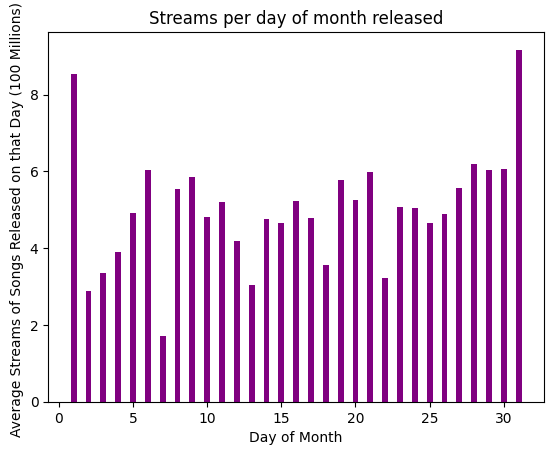

In [130]:
# 6. What's the best day of the month to release a song on to get the most streams? 
days = range(0,32)
days_and_streams = {}


for d in days:
    if d not in days_and_streams:
        days_and_streams[d] = 0
    avg_number_streams = df.loc[df['released_day'] ==d, 'streams'].mean() /100000000
    days_and_streams[d] = avg_number_streams


days_of_month = list(days_and_streams.keys())
streams_of_day = list(days_and_streams.values())

plt.bar(days_of_month, streams_of_day, width=0.4, color='purple')

plt.title("Streams per day of month released")
plt.ylabel("Average Streams of Songs Released on that Day (100 Millions) ")
plt.xlabel("Day of Month")



Text(0.5, 0, 'Month')

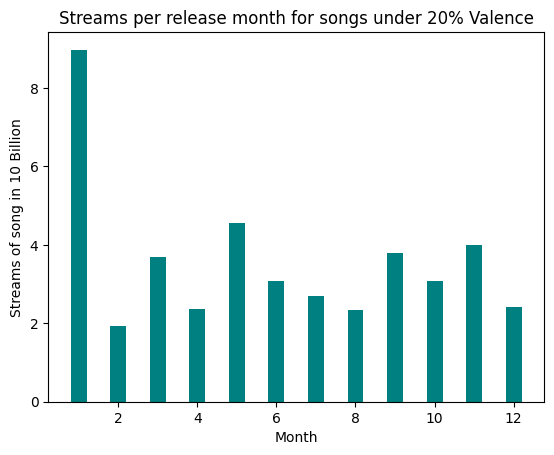

In [154]:
#7. For song's with a valence under 20%, which release month leads to the highest stream count?

data = df.loc[df['valence_%'] > 20]
months = list(df['released_month'].unique())
months.sort()
months_valence = {}

for m in months:
        if m not in months_valence:
            months_valence[m] = 0
        add_months_valence = data.loc[data['released_month'] == m, 'streams'].sum() / 10000000000
        months_valence[m] = add_months_valence



x_month = list(months_valence.keys())
y_valence = list(months_valence.values())

plt.bar(x_month, y_valence, width=0.4, color='teal')

plt.title("Streams per release month for songs under 20% Valence")
plt.ylabel("Streams of song in 10 Billion")
plt.xlabel("Month")